# Курсовая работа Бекиров ПМ22-3
# Тема: машинное обучение в задачах распознования объектов на фотографии

## Установка библиотек

In [102]:
!pip install tensorflow opencv-python matplotlib

In [323]:
import tensorflow as tf
import os

## Считывание Данных

In [324]:
train = tf.keras.utils.image_dataset_from_directory('data\\train', label_mode='categorical')
test  = tf.keras.utils.image_dataset_from_directory('data\\test', label_mode='categorical')
validation = tf.keras.utils.image_dataset_from_directory('data\\validation', label_mode='categorical')

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [325]:
data_to_show = train.as_numpy_iterator().next()

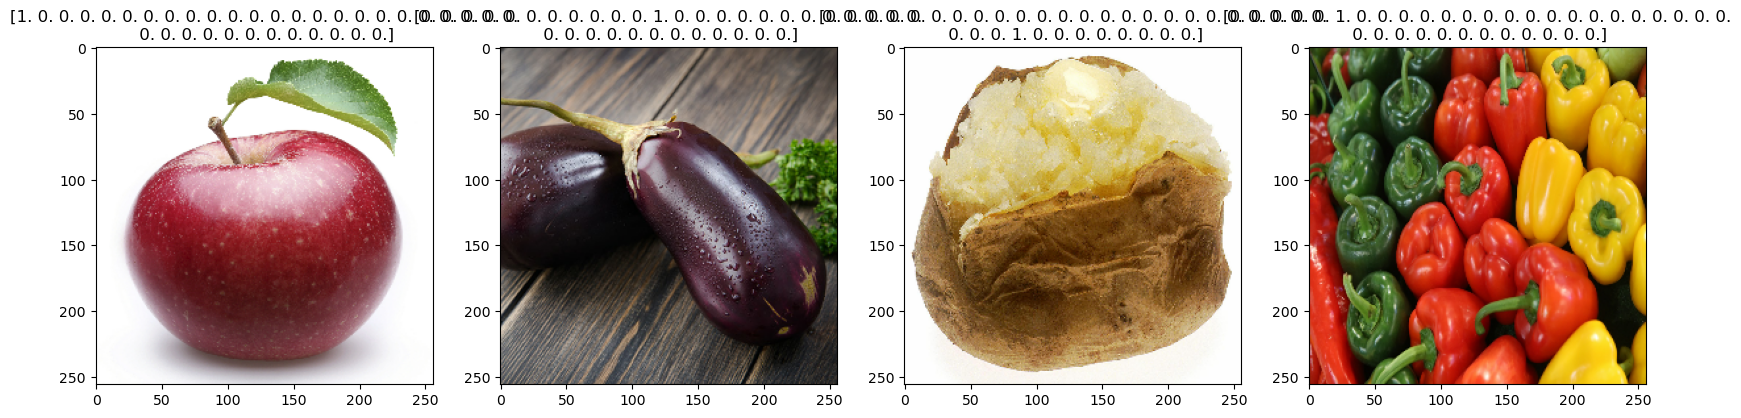

In [326]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(data_to_show[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(data_to_show[1][idx])

In [327]:
train = train.map(lambda x, y: (x/255, y))
test  = test.map(lambda x, y: (x/255, y))
validation = validation.map(lambda x, y: (x/255, y))

## Создание Нейронной Сети

In [345]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [346]:
model = Sequential()

In [347]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(36, activation='softmax'))

In [348]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [349]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,705,620 (14.14 MB)

 Trainable params: 3,705,620 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

## Обучение

In [350]:
logdir='logs'

In [351]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [352]:
hist = model.fit(train, epochs=15, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 277ms/step - accuracy: 0.0423 - loss: 3.6137 - val_accuracy: 0.1795 - val_loss: 2.9925
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 273ms/step - accuracy: 0.1228 - loss: 3.0846 - val_accuracy: 0.3447 - val_loss: 2.2783
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 275ms/step - accuracy: 0.2794 - loss: 2.5934 - val_accuracy: 0.5641 - val_loss: 1.7476
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 271ms/step - accuracy: 0.4275 - loss: 2.0292 - val_accuracy: 0.8433 - val_loss: 0.7690
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 274ms/step - accuracy: 0.6599 - loss: 1.1831 - val_accuracy: 0.9060 - val_loss: 0.5744
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 274ms/step - accuracy: 0.8587 - loss: 0.5188 - val_accuracy: 0.9288 - val_loss: 0.5489
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 274ms/step - accuracy: 0.9297 - loss: 0.2838 - val_accuracy: 0.9516 - val_loss: 0.4277
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 274ms/step - accuracy: 0.9703 - loss: 0.1748 - val_accu

In [353]:
hist.history

{'accuracy': [0.06484751403331757,
  0.1550561785697937,
  0.3181380331516266,
  0.5069020986557007,
  0.7287319302558899,
  0.8940609693527222,
  0.9467094540596008,
  0.9733547568321228,
  0.9839486479759216,
  0.9884430170059204,
  0.9887640476226807,
  0.9887640476226807,
  0.9900481700897217,
  0.9868378639221191,
  0.9910112619400024],
 'loss': [3.447026014328003,
  2.9713432788848877,
  2.4510440826416016,
  1.7659798860549927,
  0.9662466049194336,
  0.40704676508903503,
  0.2346213012933731,
  0.15607523918151855,
  0.10222166776657104,
  0.07684867084026337,
  0.0657181590795517,
  0.059838827699422836,
  0.05094074830412865,
  0.056141022592782974,
  0.04571741446852684],
 'val_accuracy': [0.1794871836900711,
  0.34472933411598206,
  0.5641025900840759,
  0.8433048725128174,
  0.9059829115867615,
  0.9287749528884888,
  0.9515669345855713,
  0.9601139426231384,
  0.9601139426231384,
  0.9544159770011902,
  0.9629629850387573,
  0.9544159770011902,
  0.9658119678497314,
  0.9

## Кривые обучения

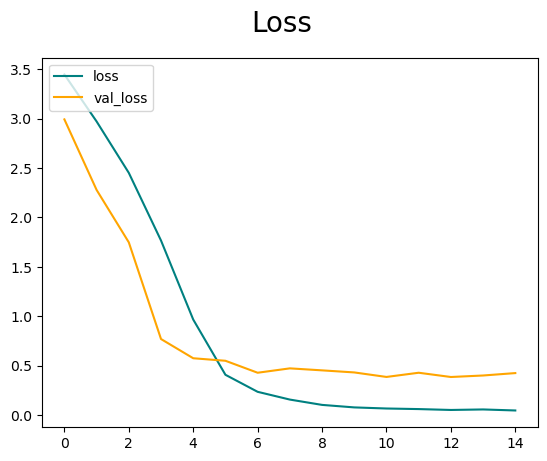

In [354]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

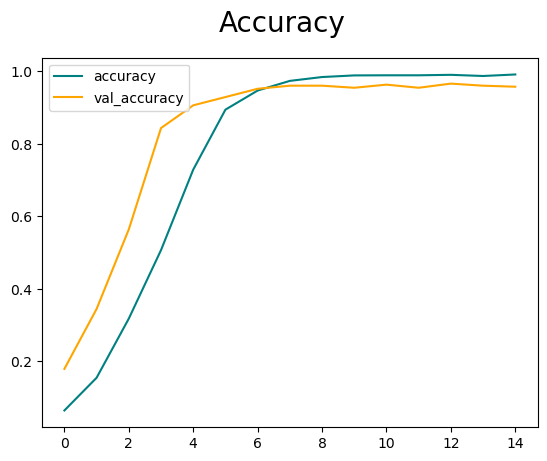

In [355]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [376]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy

In [394]:
def to_one_hot_encoding(array):
    # Находим максимальное значение в каждой строке
    max_values = np.max(array, axis=1, keepdims=True)
    
    # Создаем маску, устанавливая 1 для максимального элемента в каждой строке
    encoded = (array == max_values).astype(float)

    return encoded
    

In [395]:
pre = Precision()
rec = Recall()
acc = Accuracy()

In [396]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat_prob = model.predict(X)
    yhat = to_one_hot_encoding(yhat_prob)
    print(y, "asd", yhat)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] asd [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] asd [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] asd [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ..

In [397]:
acc.result().numpy(), pre.result().numpy(), rec.result().numpy()

(0.9976787, 0.95821726, 0.95821726)

## Тесты

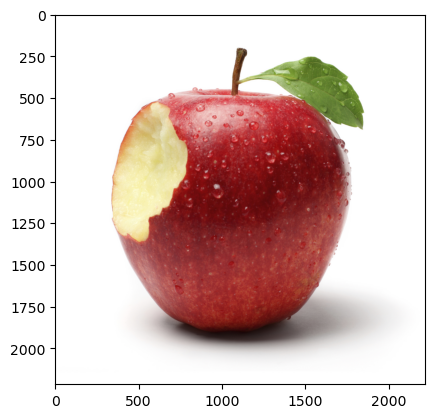

In [405]:
# Читаем изображение в формате BGR
img_bgr = cv2.imread('data\\test\\apple\\Image_1.jpg')

# Преобразуем изображение из формата BGR в RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Отображаем изображение
plt.imshow(img_rgb)
plt.show()

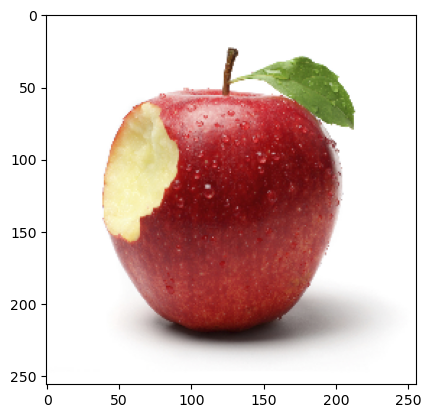

In [408]:
resize = tf.image.resize(img_rgb, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [409]:
resize.shape

TensorShape([256, 256, 3])

In [410]:
np.expand_dims(resize/255, 0).shape

(1, 256, 256, 3)

In [411]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [412]:
to_one_hot_encoding(yhat)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

## Сохранение модели

In [413]:
from tensorflow.keras.models import load_model

In [415]:
model.save(os.path.join('models','fruits-and-vegetables-classifier.keras'))

In [419]:
new_model = load_model('models\\fruits-and-vegetables-classifier.keras')

D:\Anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [421]:
to_one_hot_encoding(new_model.predict(np.expand_dims(resize/255, 0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])